Dataset - https://www.kaggle.com/zygmunt/goodbooks-10k

Book Recommendation System

A naive item-similarity based recommendar system.

Although the dataset has context based information, this kernel has been build purely using collaborative filtering technique.
This is the first version of kernel and has not been optimized in any way.
There are better distance/similarity measures for these kind of problems
Please feel free to give any suggestions that I can incorporate in coming version

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving books.csv to books.csv
Saving ratings.csv to ratings.csv


In [ ]:
bookDF=pd.read_csv('books.csv')
bookDF=bookDF.drop(['image_url','small_image_url','title','best_book_id','isbn','isbn13'],axis=1)
ratingsDF = pd.read_csv('ratings.csv')

In [ ]:
bookDF.head(5)

,id,book_id,work_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2792775,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,4640799,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,3212258,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,3275794,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,245494,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


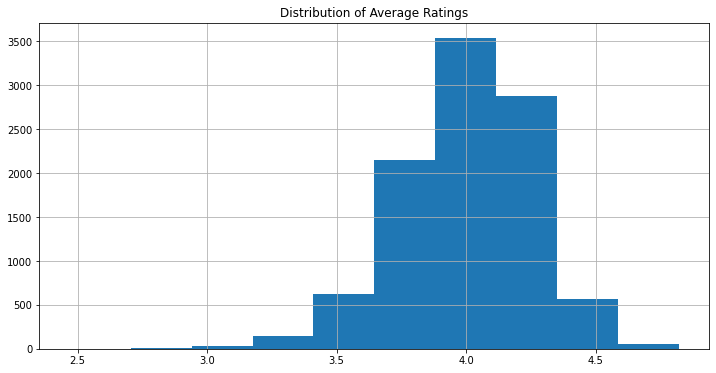

In [ ]:
#distribution of average ratings of all the 10000 books
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Distribution of Average Ratings")
bookDF["average_rating"].hist()
display()

In [ ]:
ratingsDF.head(5)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


This part of the code is responsible for building the item-item similarity matrix We first convert build a list of dictionary. Each dictionary corresponds to a single book. The user_id is the key, while rating given by the user for the book is its value.

In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0;
testdf = ratingsDF
testdf=testdf[['user_id','rating']].groupby(testdf['book_id'])
for groupKey in testdf.groups.keys():
    tempDict={}

    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]]=groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

We then use sklearn's DictVectorizer() function to create vectors corresponding to each book. We are trying to create a vector space with users as column vectors. Each point in the vector space represents a book. Rating of the book given an user is its magnitude. We then calculate similarity/distance between books in this vector space.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)

We finally use sklearn's consine_similarity function to calculate pairwise similarity matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
pairwiseSimilarity = cosine_similarity(vector)

At last we define a function that takes an input id and outputs 5 top most recommendations. Please note that this id is the column id in book.csv. Values of id are in [1,10000]

In [ ]:
def printBookDetails(bookID):
    print("Title:", bookDF[bookDF['id']==bookID]['original_title'].values[0])
    print("Author:",bookDF[bookDF['id']==bookID]['authors'].values[0])
    print("Printing Book-ID:",bookID)
    print("=================++++++++++++++=========================")


def getTopRecommandations(bookID):
    row = reverseIndexMap[bookID]
    print("------INPUT BOOK--------")
    printBookDetails(bookID)
    print("-------RECOMMENDATIONS----------")
    similarBookIDs = [printBookDetails(indexMap[i]) for i in np.argsort(pairwiseSimilarity[row])[-7:-2][::-1]]

In [ ]:
getTopRecommandations(23)

------INPUT BOOK--------
Title: Harry Potter and the Chamber of Secrets
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 23
=================++++++++++++++=========================
-------RECOMMENDATIONS----------
Title: Harry Potter and the Goblet of Fire
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 24
=================++++++++++++++=========================
Title: Harry Potter and the Order of the Phoenix
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 21
=================++++++++++++++=========================
Title: Harry Potter and the Half-Blood Prince
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 27
=================++++++++++++++=========================
Title: Harry Potter and the Deathly Hallows
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 25
=================++++++++++++++=========================
Title: Harry Potter and the Philosopher's Stone
Author: J.K. Rowling, Mary GrandPré
Printing Book-ID: 2
=================++++++++++++++========

In [ ]:
getTopRecommandations(347)

------INPUT BOOK--------
Title: Prince Caspian: The Return to Narnia
Author: C.S. Lewis
Printing Book-ID: 347
=================++++++++++++++=========================
-------RECOMMENDATIONS----------
Title: The horse and his boy
Author: C.S. Lewis
Printing Book-ID: 542
=================++++++++++++++=========================
Title: The Silver Chair
Author: C.S. Lewis, Pauline Baynes
Printing Book-ID: 602
=================++++++++++++++=========================
Title: The Voyage of the Dawn Treader
Author: C.S. Lewis, Pauline Baynes
Printing Book-ID: 292
=================++++++++++++++=========================
Title: The Last Battle
Author: C.S. Lewis
Printing Book-ID: 641
=================++++++++++++++=========================
Title: The Chronicles of Narnia
Author: C.S. Lewis, Pauline Baynes
Printing Book-ID: 219
=================++++++++++++++=========================


In [ ]:
getTopRecommandations(1)

In [ ]:
getTopRecommandations(2)